### Import libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Preprocessing

##### Dataset 2019

In [30]:
# Import file
data_2019 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2019.csv", header=None)

# Menghapus baris 0, 1, dan 2 yang berisi judul dan deskripsi dataset
data_2019 = data_2019.drop([0, 1, 2])

# Reset indeks
data_2019.reset_index(drop=True, inplace=True)

# Mengisi missing values ('-') dengan np.NA
data_2019.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2019.dropna(inplace=True)

# Mengganti nama fitur menjadi ['Provinsi'] + ['{bulan}_2019'] * 12 + ['Tahunan']
new_features = ['Provinsi'] + [f'{month}_{year}' for month, year in zip(['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember'], ['2019'] * 12)] + ['Tahunan']
data_2019.columns = new_features

# Drop kolom yang tidak diperlukan (Tahunan)
data_2019.drop(columns=['Tahunan'], inplace=True)

# Menampilkan data setelah mengganti nama kolom
print(data_2019.columns)
print(data_2019.shape)
print(data_2019.head())


Index(['Provinsi', 'januari_2019', 'februari_2019', 'maret_2019', 'april_2019',
       'mei_2019', 'juni_2019', 'juli_2019', 'agustus_2019', 'september_2019',
       'oktober_2019', 'november_2019', 'desember_2019'],
      dtype='object')
(35, 13)
         Provinsi januari_2019 februari_2019 maret_2019 april_2019 mei_2019  \
1            ACEH      1387574       1111607    1113176    1155705  1070909   
2  SUMATERA UTARA      5094564       3282713    3442407    3676763  3469100   
3  SUMATERA BARAT      1667509       1313185    1420799    1573606  1511963   
4            RIAU      1990985       1425092    1541155    1563303  1574681   
5           JAMBI       828879        652908     716028     547378   438508   

  juni_2019 juli_2019 agustus_2019 september_2019 oktober_2019 november_2019  \
1   1800152   1323272      1508073        1174513      1219323       1198958   
2   5774370   3996409      3699782        3208776      3419415       3416228   
3   2910574   1719018      1207708   

#### Dataset 2020

In [31]:
# Import file
data_2020 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2020.csv", header=None)

# Menghapus baris 0, 1, dan 2 yang berisi informasi yang ingin dihapus
data_2020 = data_2020.drop([0, 1, 2])

# Reset indeks
data_2020.reset_index(drop=True, inplace=True)

# Mengisi missing values ('-') dengan np.NA
data_2020.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2020.dropna(inplace=True)

# Mengganti nama fitur menjadi ['Provinsi'] + ['{bulan}_2020'] * 12 + ['Tahunan']
new_features = ['Provinsi'] + [f'{month}_{year}' for month, year in zip(['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember'], ['2020'] * 12)] + ['Tahunan']
data_2020.columns = new_features

# Drop kolom yang tidak diperlukan (Provinsi dan Tahunan)
data_2020.drop(columns=['Provinsi', 'Tahunan'], inplace=True)

# Menampilkan data setelah mengganti nama kolom
print(data_2020.columns)
print(data_2020.shape)
print(data_2020.head())


Index(['januari_2020', 'februari_2020', 'maret_2020', 'april_2020', 'mei_2020',
       'juni_2020', 'juli_2020', 'agustus_2020', 'september_2020',
       'oktober_2020', 'november_2020', 'desember_2020'],
      dtype='object')
(35, 12)
  januari_2020 februari_2020 maret_2020 april_2020 mei_2020 juni_2020  \
1       483897        430589     351710     157764   258310    298482   
2      2012511       1466193    1109440     442072   576278    864667   
3       863282        779785     623248     226466   250931    562966   
4       619363        548129     464347     215636   249411    390121   
5       264201        250082     206088     114969   133020    183620   

  juli_2020 agustus_2020 september_2020 oktober_2020 november_2020  \
1    333571       392055         293602       340415        322558   
2   1082687      1291700        1016798      1232110       1120288   
3    754303       827245         555478       672099        661261   
4    440119       497048         422867      

#### Dataset 2021

In [32]:
# Import file
data_2021 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2021.csv", header=None)

# Menghapus baris 0, 1, dan 2 yang berisi informasi yang ingin dihapus
data_2021 = data_2021.drop([0, 1, 2])

# Reset indeks
data_2021.reset_index(drop=True, inplace=True)

# Mengisi missing values ('-') dengan np.NA
data_2021.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2021.dropna(inplace=True)

# Mengganti nama fitur menjadi ['Provinsi'] + ['{bulan}_2021'] * 12 + ['Tahunan']
new_features = ['Provinsi'] + [f'{month}_{year}' for month, year in zip(['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember'], ['2021'] * 12)] + ['Tahunan']
data_2021.columns = new_features

# Drop kolom yang tidak diperlukan (Provinsi dan Tahunan)
data_2021.drop(columns=['Provinsi', 'Tahunan'], inplace=True)

# Menampilkan data setelah mengganti nama kolom
print(data_2021.columns)
print(data_2021.shape)
print(data_2021.head())


Index(['januari_2021', 'februari_2021', 'maret_2021', 'april_2021', 'mei_2021',
       'juni_2021', 'juli_2021', 'agustus_2021', 'september_2021',
       'oktober_2021', 'november_2021', 'desember_2021'],
      dtype='object')
(35, 12)
  januari_2021 februari_2021 maret_2021 april_2021 mei_2021 juni_2021  \
1       396953        421243     445804     378402   599117    457822   
2      1424081       1375473    1415803    1369304  1674445   1571487   
3       775782        735587     793796     712644  1025889    894952   
4       507998        482533     511576     451372   501143    521519   
5       247256        225630     239867     226476   280176    255590   

  juli_2021 agustus_2021 september_2021 oktober_2021 november_2021  \
1    445355       397120         440652       490983        445046   
2   1127318      1139616        1329028      1641459       1433761   
3    664848       635405         717460       829981        733146   
4    486997       418261         480952      

#### Dataset 2022

In [33]:
# Import file
data_2022 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2022.csv", header=None)

# Menghapus baris 0, 1, dan 2 yang berisi informasi yang ingin dihapus
data_2022 = data_2022.drop([0, 1, 2])

# Reset indeks
data_2022.reset_index(drop=True, inplace=True)

# Mengisi missing values ('-') dengan np.NA
data_2022.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2022.dropna(inplace=True)

# Mengganti nama fitur menjadi ['Provinsi'] + ['{bulan}_2022'] * 12 + ['Tahunan']
new_features = ['Provinsi'] + [f'{month}_{year}' for month, year in zip(['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember'], ['2022'] * 12)] + ['Tahunan']
data_2022.columns = new_features

# Drop kolom yang tidak diperlukan (Provinsi dan Tahunan)
data_2022.drop(columns=['Provinsi', 'Tahunan'], inplace=True)

# Menampilkan data setelah mengganti nama kolom
print(data_2022.columns)
print(data_2022.shape)
print(data_2022.head())


Index(['januari_2022', 'februari_2022', 'maret_2022', 'april_2022', 'mei_2022',
       'juni_2022', 'juli_2022', 'agustus_2022', 'september_2022',
       'oktober_2022', 'november_2022', 'desember_2022'],
      dtype='object')
(35, 12)
  januari_2022 februari_2022 maret_2022 april_2022 mei_2022 juni_2022  \
1       526417        501651     585675     434633   935025    566361   
2      2022964       1636066    1846809    1658463  2896949   1987624   
3       926043        814741    1007630     838560  1655583    988346   
4       636543        581783     673534     597000   897026    692293   
5       302504        255285     313009     310853   449078    316554   

  juli_2022 agustus_2022 september_2022 oktober_2022 november_2022  \
1    748573       531072         500673       513056        471520   
2   2216932      1678953        1664991      1785747       1525633   
3   1176922       905311         891560       949081        877671   
4    795698       662795         677309      

#### Dataset 2023

In [34]:
# Import file
data_2023 = pd.read_csv("Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2023.csv", header=None)

# Menghapus baris 0, 1, dan 2 yang berisi informasi yang ingin dihapus
data_2023 = data_2023.drop([0, 1, 2])

# Reset indeks
data_2023.reset_index(drop=True, inplace=True)

# Mengisi missing values ('-') dengan np.NA
data_2023.replace('-', pd.NA, inplace=True)

# Drop NaN values 
data_2023.dropna(inplace=True)

# Mengganti nama fitur menjadi ['Provinsi'] + ['{bulan}_2023'] * 12 + ['Tahunan']
new_features = ['Provinsi'] + [f'{month}_{year}' for month, year in zip(['januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember'], ['2023'] * 12)] + ['Tahunan']
data_2023.columns = new_features

# Drop kolom yang tidak diperlukan (Provinsi dan Tahunan)
data_2023.drop(columns=['Provinsi', 'Tahunan'], inplace=True)

# Menampilkan data setelah mengganti nama kolom
print(data_2023.columns)
print(data_2023.shape)
print(data_2023.head())


Index(['januari_2023', 'februari_2023', 'maret_2023', 'april_2023', 'mei_2023',
       'juni_2023', 'juli_2023', 'agustus_2023', 'september_2023',
       'oktober_2023', 'november_2023', 'desember_2023'],
      dtype='object')
(35, 12)
  januari_2023 februari_2023 maret_2023 april_2023 mei_2023 juni_2023  \
1       663437        517850     557272     756915   791968    701963   
2      2962641       1870691    1852752    2673955  2556839   2416258   
3      1345098       1024017    1056957    1373374  1538507   1407632   
4       914340        729078     759760     935938   977332   1016640   
5       380949        293566     302700     414742   421741    424987   

  juli_2023 agustus_2023 september_2023 oktober_2023 november_2023  \
1    871519       618671         565184       588020        637519   
2   2462212      1889717        1847654      1958158       1870337   
3   1413899      1072952        1083013      1121805        904282   
4   1048542       893939         866457      

#### Menggabungkan dataset 2019-2023

In [36]:
# Menggabungkan dataset menggunakan concat
data = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023], axis=1)

# Menghapus baris terakhir yang berisi jumlah perjalanan negara
data = data.drop(data.index[-1])

# Menampilkan fitur yang ada di dataset
print(data.shape[1])
print(data.columns)

# Membuat file csv dari data yang sudah dipreprocessing
data.to_csv('Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2019-2023.csv', index=False)

# Import data menggunakan file yang telah dipreprocessing
data = pd.read_csv('Jumlah Perjalanan Wisatawan Nusantara Menurut Provinsi Tujuan, 2019-2023.csv')

61
Index(['Provinsi', 'januari_2019', 'februari_2019', 'maret_2019', 'april_2019',
       'mei_2019', 'juni_2019', 'juli_2019', 'agustus_2019', 'september_2019',
       'oktober_2019', 'november_2019', 'desember_2019', 'januari_2020',
       'februari_2020', 'maret_2020', 'april_2020', 'mei_2020', 'juni_2020',
       'juli_2020', 'agustus_2020', 'september_2020', 'oktober_2020',
       'november_2020', 'desember_2020', 'januari_2021', 'februari_2021',
       'maret_2021', 'april_2021', 'mei_2021', 'juni_2021', 'juli_2021',
       'agustus_2021', 'september_2021', 'oktober_2021', 'november_2021',
       'desember_2021', 'januari_2022', 'februari_2022', 'maret_2022',
       'april_2022', 'mei_2022', 'juni_2022', 'juli_2022', 'agustus_2022',
       'september_2022', 'oktober_2022', 'november_2022', 'desember_2022',
       'januari_2023', 'februari_2023', 'maret_2023', 'april_2023', 'mei_2023',
       'juni_2023', 'juli_2023', 'agustus_2023', 'september_2023',
       'oktober_2023', 'novem

#### Menghitung statistik deskriptif

In [67]:
stats = data.describe().T.round(2)
stats

,count,mean,std,min,25%,50%,75%,max
januari_2019,34.0,1787771.79,2440059.92,90789.0,338613.50,813625.0,1934076.00,11116072.0
februari_2019,34.0,1311435.97,1899786.67,48019.0,256349.75,651720.0,1380377.50,9942434.0
maret_2019,34.0,1666740.24,2457786.79,84467.0,275433.00,709047.5,1589944.00,11088052.0
april_2019,34.0,1701670.35,2673674.52,102283.0,237821.00,662101.5,1571030.25,11993275.0
mei_2019,34.0,1516139.29,2273896.83,109827.0,241131.25,670567.0,1435722.00,10148348.0
juni_2019,34.0,2314456.35,3725873.29,119683.0,339172.25,935747.5,2239787.75,17758640.0
juli_2019,34.0,1698219.76,2584133.77,102619.0,300326.50,765201.5,1709901.75,12666376.0
agustus_2019,34.0,1891383.56,2963192.71,99582.0,291442.00,751572.5,1591248.00,13851900.0
september_2019,34.0,1629603.06,2579218.56,73498.0,250047.50,648653.0,1381884.50,11808826.0
oktober_2019,34.0,1828636.91,2943878.71,93397.0,281861.00,681511.5,1539476.50,13129658.0


##### Mean dari kunjungan wisatawan nusantara per bulan

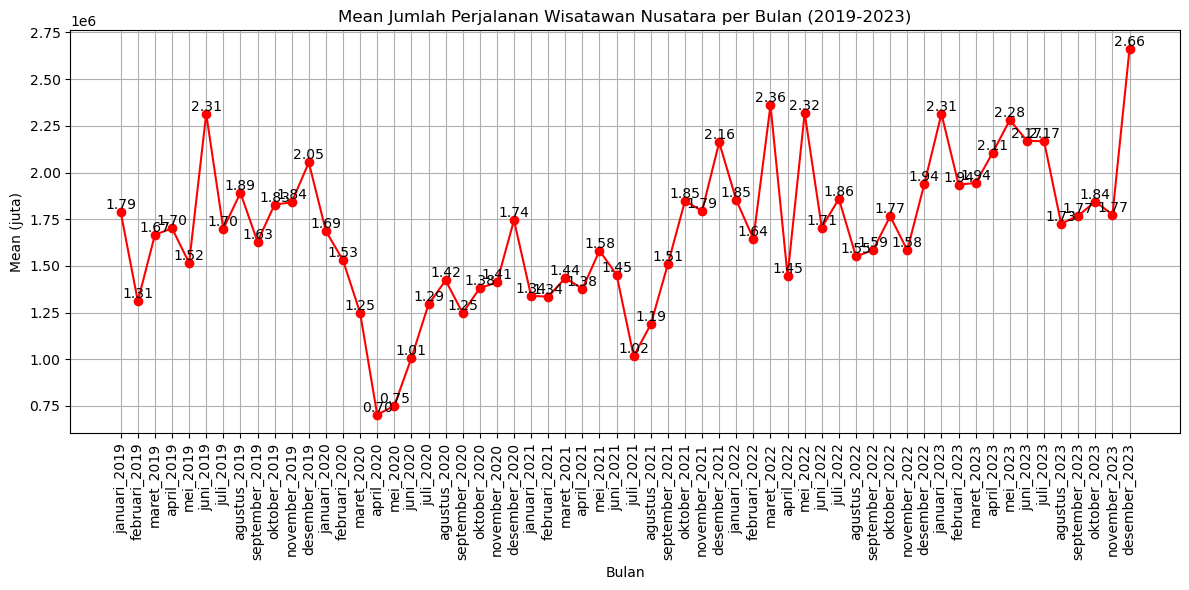

In [56]:
# Menghitung mean per kolom
mean = data.iloc[:, 1:].mean().round(2)

#  Membuat plot mean
plt.figure(figsize=(12, 6))
plt.plot(mean, marker='o', color='r')

# Menambahkan angka pada masing-masing titik di plot
for i, value in enumerate(mean):
    plt.text(i, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Mean Jumlah Perjalanan Wisatawan Nusatara per Bulan (2019-2023)')
plt.xlabel('Bulan')
plt.ylabel('Mean (juta)')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Median dari kunjungan wisatawan nusantara per bulan

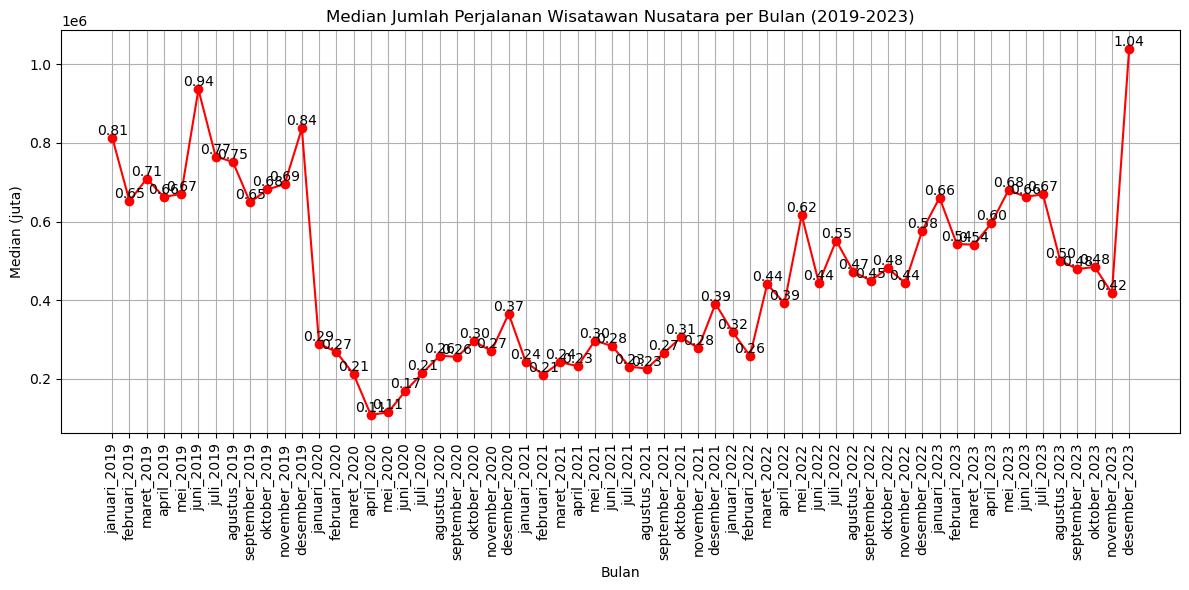

In [55]:
# Menghitung median per kolom
median = data.iloc[:, 1:].median().round(2)

#  Membuat plot median
plt.figure(figsize=(12, 6))
plt.plot(median, marker='o', color='r')

# Menambahkan angka pada masing-masing titik di plot
for i, value in enumerate(median):
    plt.text(i, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Median Jumlah Perjalanan Wisatawan Nusatara per Bulan (2019-2023)')
plt.xlabel('Bulan')
plt.ylabel('Median (juta)')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Standar deviasi dari kunjungan wisatawan nusantara per bulan

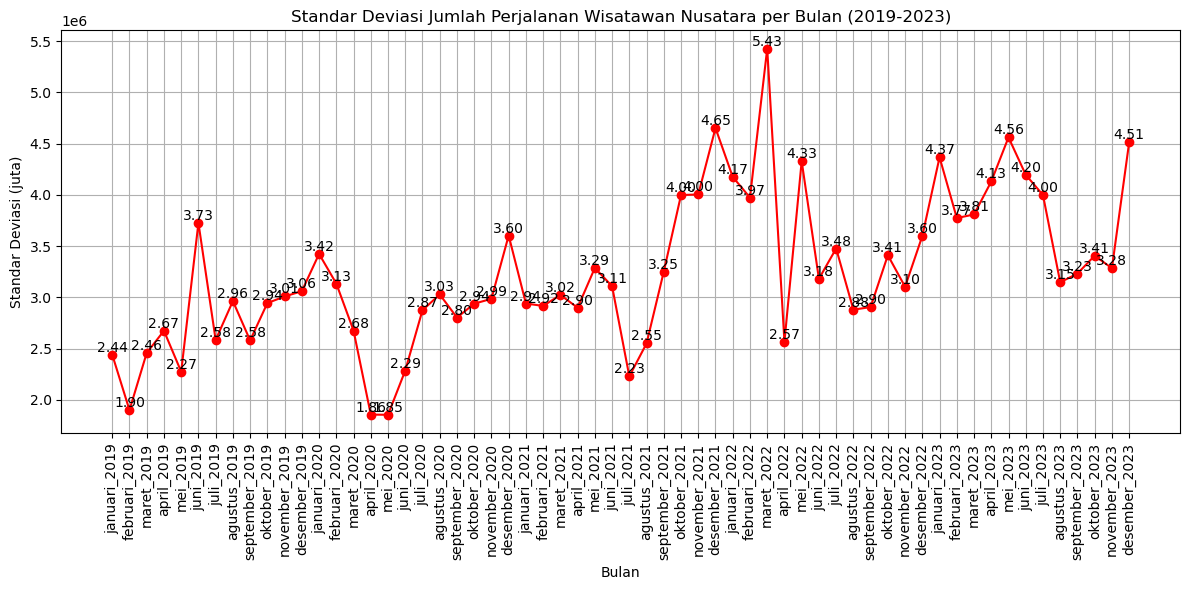

In [75]:
# Menghitung standar deviasi
std = data.iloc[:, 1:].std().round(2)

#  Membuat plot standar deviasi
plt.figure(figsize=(12, 6))
plt.plot(std, marker='o', color='r')

# Menambahkan angka pada masing-masing titik di plot
for i, value in enumerate(std):
    plt.text(i, value, f'{value/1e6:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Standar Deviasi Jumlah Perjalanan Wisatawan Nusatara per Bulan (2019-2023)')
plt.xlabel('Bulan')
plt.ylabel('Standar Deviasi (juta)')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

#### Min dan max dari kunjungan wisatawan nusantara per bulan

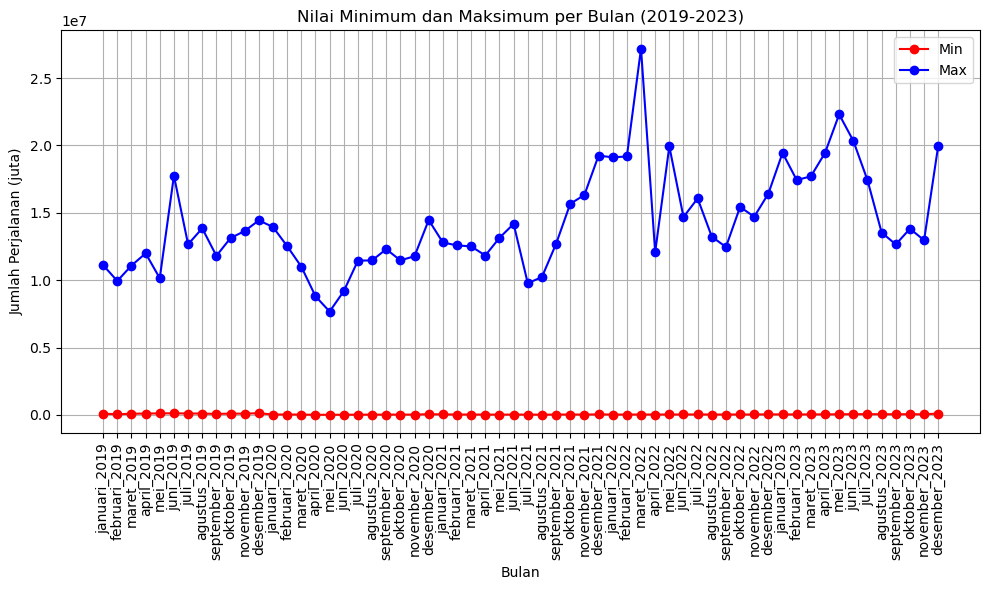

In [87]:
# Menghitung nilai minimum dan maksimum
min_data = data.iloc[:, 1:].min()
max_data = data.iloc[:, 1:].max()

# Plot minimum dan maksimum
plt.figure(figsize=(10, 6))
plt.plot(min_data, marker='o', color='red', label='Min')
plt.plot(max_data, marker='o', color='blue', label='Max')

plt.title('Nilai Minimum dan Maksimum per Bulan (2019-2023)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Perjalanan (juta)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Melakukan normalisasi data

In [ ]:
# Normalisasi data menggunakan MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data.iloc[:, 1:])
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns[1:])
# data = data_scaled

# # Menampilkan data yang sudah dinormalisasi
# data